In [2]:
import nltk
import gensim
import string
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import numpy as np 
import re

In [3]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Deepu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Deepu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
corpus=["My name is sudhanshu kumar.",
        "I use to teach all the data stack along with ops and cloud! ,",
        "sfsgfjsg jhsgdyjsv  jhsgdyjbdgfb mhgskukgbdfgb seghujsb ,",
        "nlp is very very amazing ,",
        "we are trying to learn  word2vec ,",
        "ArithmeticError ,",
        "we will also work on cleaning the data which is basically a part of the data processing ,",
        "Natural Language is a part of AI," ,
        "word 2 vec is being used for word embeddings",
        "It is going to perform better then one hot , bow or TI-IDF" ]

Data Preprocessing

In [5]:
s="my name is Sudhnahsu Lfejbc u4932"

In [6]:
s.lower()

'my name is sudhnahsu lfejbc u4932'

In [7]:
re.sub(r'\d',"",s)

'my name is Sudhnahsu Lfejbc u'

In [8]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:
s.translate(str.maketrans("","",string.punctuation))

'my name is Sudhnahsu Lfejbc u4932'

In [10]:
word_tokenize(s)

['my', 'name', 'is', 'Sudhnahsu', 'Lfejbc', 'u4932']

In [11]:
s1=['my', 'name', 'is', 'Sudhnahsu', 'Lfejbc', 'u4932']

In [12]:
[i for i in s1 if i not in stopwords.words('english')]

['name', 'Sudhnahsu', 'Lfejbc', 'u4932']

In [13]:
def word_preprocessing(text):
    text = text.lower()
    text = re.sub(r'\d+', "", text)  
    text = text.translate(str.maketrans("", "", string.punctuation))  
    word = word_tokenize(text)  
    word = [i for i in word if i not in stopwords.words('english')]  

    return word


In [14]:
corpus

['My name is sudhanshu kumar.',
 'I use to teach all the data stack along with ops and cloud! ,',
 'sfsgfjsg jhsgdyjsv  jhsgdyjbdgfb mhgskukgbdfgb seghujsb ,',
 'nlp is very very amazing ,',
 'we are trying to learn  word2vec ,',
 'ArithmeticError ,',
 'we will also work on cleaning the data which is basically a part of the data processing ,',
 'Natural Language is a part of AI,',
 'word 2 vec is being used for word embeddings',
 'It is going to perform better then one hot , bow or TI-IDF']

In [15]:
processed_corpus=[word_preprocessing(sentence) for sentence in corpus]

In [16]:
processed_corpus

[['name', 'sudhanshu', 'kumar'],
 ['use', 'teach', 'data', 'stack', 'along', 'ops', 'cloud'],
 ['sfsgfjsg', 'jhsgdyjsv', 'jhsgdyjbdgfb', 'mhgskukgbdfgb', 'seghujsb'],
 ['nlp', 'amazing'],
 ['trying', 'learn', 'wordvec'],
 ['arithmeticerror'],
 ['also',
  'work',
  'cleaning',
  'data',
  'basically',
  'part',
  'data',
  'processing'],
 ['natural', 'language', 'part', 'ai'],
 ['word', 'vec', 'used', 'word', 'embeddings'],
 ['going', 'perform', 'better', 'one', 'hot', 'bow', 'tiidf']]

In [17]:
word2vec_cbow=Word2Vec(sentences=processed_corpus,vector_size=100,window=5,min_count=1,sg=0)

In [18]:
word2vec_skipgram=Word2Vec(sentences=processed_corpus,vector_size=100,window=5,min_count=1,sg=1)


In [19]:
word2vec_cbow

In [20]:
word2vec_skipgram

In [21]:
word2vec_skipgram.wv['sudhanshu']

array([ 5.6267120e-03,  5.4973708e-03,  1.8291199e-03,  5.7494068e-03,
       -8.9680776e-03,  6.5593575e-03,  9.2259916e-03, -4.2071473e-03,
        1.6075504e-03, -5.2338815e-03,  1.0582185e-03,  2.7701687e-03,
        8.1607364e-03,  5.4401276e-04,  2.5570584e-03,  1.2977350e-03,
        8.4025227e-03, -5.7077026e-03, -6.2618302e-03, -3.6275184e-03,
       -2.3005498e-03,  5.0410628e-03, -8.1203571e-03, -2.8335357e-03,
       -8.1974268e-03,  5.1497100e-03, -2.5680638e-03, -9.0671070e-03,
        4.0717293e-03,  9.0173231e-03, -3.0376601e-03, -5.8385395e-03,
        3.0198884e-03, -4.3584823e-04, -9.9794362e-03,  8.4177041e-03,
       -7.3388875e-03, -4.9304068e-03, -2.6570810e-03, -5.4523144e-03,
        1.7165100e-03,  9.7128144e-03,  4.5722723e-03,  8.0886027e-03,
       -4.7045827e-04,  6.4492342e-04, -2.6683521e-03, -8.7795611e-03,
        3.4313034e-03,  2.0933736e-03, -9.4218543e-03, -4.9684369e-03,
       -9.7340988e-03, -5.7197916e-03,  4.0645422e-03,  8.6428607e-03,
      

In [22]:
len(word2vec_skipgram.wv['sudhanshu'])

100

In [23]:
word2vec_skipgram.wv.most_similar('sudhanshu',topn=3)

[('mhgskukgbdfgb', 0.31903737783432007),
 ('going', 0.1890084445476532),
 ('along', 0.16222433745861053)]

In [24]:
word2vec_cbow.wv['nlp']

array([-8.7274825e-03,  2.1301615e-03, -8.7354420e-04, -9.3190884e-03,
       -9.4281426e-03, -1.4107180e-03,  4.4324086e-03,  3.7040710e-03,
       -6.4986930e-03, -6.8730675e-03, -4.9994122e-03, -2.2868442e-03,
       -7.2502876e-03, -9.6033178e-03, -2.7436293e-03, -8.3628409e-03,
       -6.0388758e-03, -5.6709289e-03, -2.3441375e-03, -1.7069972e-03,
       -8.9569986e-03, -7.3519943e-04,  8.1525063e-03,  7.6904297e-03,
       -7.2061159e-03, -3.6668312e-03,  3.1185520e-03, -9.5707225e-03,
        1.4764392e-03,  6.5244664e-03,  5.7464195e-03, -8.7630618e-03,
       -4.5171441e-03, -8.1401607e-03,  4.5956374e-05,  9.2636338e-03,
        5.9733056e-03,  5.0673080e-03,  5.0610625e-03, -3.2429171e-03,
        9.5521836e-03, -7.3564244e-03, -7.2703874e-03, -2.2653891e-03,
       -7.7856064e-04, -3.2161034e-03, -5.9258583e-04,  7.4888230e-03,
       -6.9751858e-04, -1.6249407e-03,  2.7443992e-03, -8.3591007e-03,
        7.8558037e-03,  8.5361041e-03, -9.5840869e-03,  2.4462664e-03,
      

In [25]:
word2vec_cbow.wv.similarity("nlp","ai")

-0.03804626

In [26]:
word2vec_cbow.wv.index_to_key

['data',
 'word',
 'part',
 'cloud',
 'amazing',
 'nlp',
 'seghujsb',
 'mhgskukgbdfgb',
 'jhsgdyjbdgfb',
 'jhsgdyjsv',
 'sfsgfjsg',
 'tiidf',
 'learn',
 'ops',
 'along',
 'stack',
 'teach',
 'use',
 'kumar',
 'sudhanshu',
 'trying',
 'arithmeticerror',
 'wordvec',
 'vec',
 'hot',
 'one',
 'better',
 'perform',
 'going',
 'embeddings',
 'used',
 'ai',
 'bow',
 'language',
 'natural',
 'processing',
 'basically',
 'cleaning',
 'work',
 'also',
 'name']

In [27]:
word2vec_cbow.wv.most_similar("sudhanshu",topn=5)

[('mhgskukgbdfgb', 0.3190403878688812),
 ('going', 0.18893900513648987),
 ('along', 0.16205990314483643),
 ('one', 0.1277230978012085),
 ('natural', 0.12737302482128143)]

In [28]:
word2vec_skipgram.wv.most_similar("sudhanshu",topn=5)

[('mhgskukgbdfgb', 0.31903737783432007),
 ('going', 0.1890084445476532),
 ('along', 0.16222433745861053),
 ('one', 0.12808766961097717),
 ('natural', 0.12737302482128143)]

In [29]:
from sklearn.manifold import TSNE


In [32]:
word_vectors=word2vec_cbow.wv
vocab=list(word_vectors.index_to_key)

In [33]:
vocab

['data',
 'word',
 'part',
 'cloud',
 'amazing',
 'nlp',
 'seghujsb',
 'mhgskukgbdfgb',
 'jhsgdyjbdgfb',
 'jhsgdyjsv',
 'sfsgfjsg',
 'tiidf',
 'learn',
 'ops',
 'along',
 'stack',
 'teach',
 'use',
 'kumar',
 'sudhanshu',
 'trying',
 'arithmeticerror',
 'wordvec',
 'vec',
 'hot',
 'one',
 'better',
 'perform',
 'going',
 'embeddings',
 'used',
 'ai',
 'bow',
 'language',
 'natural',
 'processing',
 'basically',
 'cleaning',
 'work',
 'also',
 'name']

In [34]:
len(vocab)

41

In [38]:
x=np.array([word_vectors[i] for i in vocab])

Dimensionality Reduction

In [44]:
tsne=TSNE(n_components=2)

In [45]:
tsne.fit_transform(x)

array([[-0.5659482 ,  0.80919284],
       [-1.706417  ,  1.6686146 ],
       [-1.4867033 ,  0.8113456 ],
       [-2.223734  ,  1.0288631 ],
       [-1.5319421 ,  0.03436349],
       [-2.3121774 ,  0.30326837],
       [-0.8503993 ,  0.29204446],
       [-0.96059316,  0.94339335],
       [-1.8335016 ,  1.08319   ],
       [-0.45450678,  1.126318  ],
       [-0.6132091 ,  1.2976037 ],
       [-1.4962934 ,  0.77035683],
       [-0.56785405,  0.94729245],
       [-1.6496979 , -0.05819248],
       [-2.162565  ,  1.2877785 ],
       [-1.4685253 ,  2.1614134 ],
       [-0.34641463,  0.27852425],
       [-2.162055  ,  1.227318  ],
       [-1.3379977 ,  1.1975809 ],
       [-1.1034243 ,  0.66860247],
       [-1.5706147 ,  0.8192966 ],
       [-1.178591  ,  0.28718752],
       [-1.3720732 ,  1.8260353 ],
       [-0.9424656 ,  1.8232572 ],
       [-0.23713733,  1.6100823 ],
       [-1.0838183 , -0.00624029],
       [-1.1370486 ,  0.13912809],
       [-1.7301362 ,  1.3499618 ],
       [-0.63764805,

In [46]:
x_new_embedings=tsne.fit_transform(x)

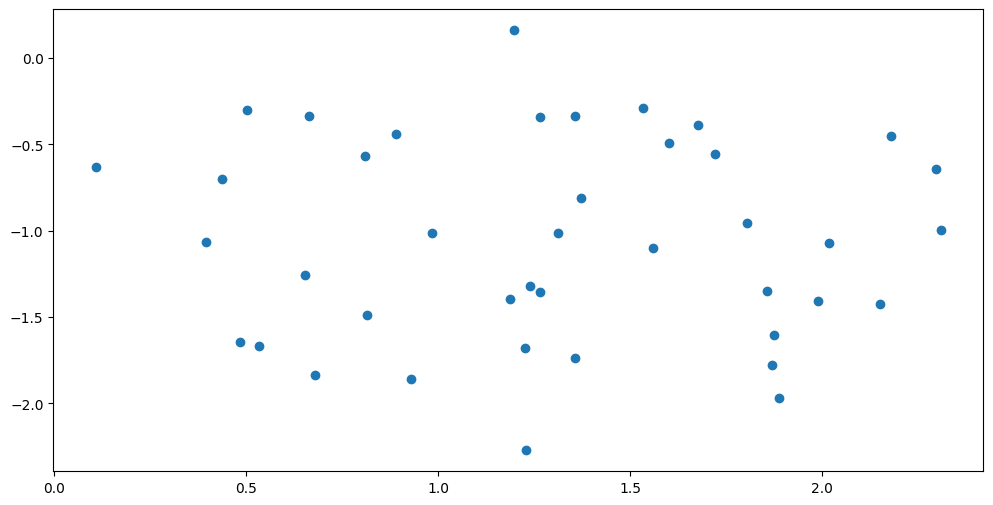

In [47]:
plt.figure(figsize=(12,6))
plt.scatter(x_new_embedings[: , 0] , x_new_embedings[:,1],marker='o')


In [48]:
vocab

['data',
 'word',
 'part',
 'cloud',
 'amazing',
 'nlp',
 'seghujsb',
 'mhgskukgbdfgb',
 'jhsgdyjbdgfb',
 'jhsgdyjsv',
 'sfsgfjsg',
 'tiidf',
 'learn',
 'ops',
 'along',
 'stack',
 'teach',
 'use',
 'kumar',
 'sudhanshu',
 'trying',
 'arithmeticerror',
 'wordvec',
 'vec',
 'hot',
 'one',
 'better',
 'perform',
 'going',
 'embeddings',
 'used',
 'ai',
 'bow',
 'language',
 'natural',
 'processing',
 'basically',
 'cleaning',
 'work',
 'also',
 'name']

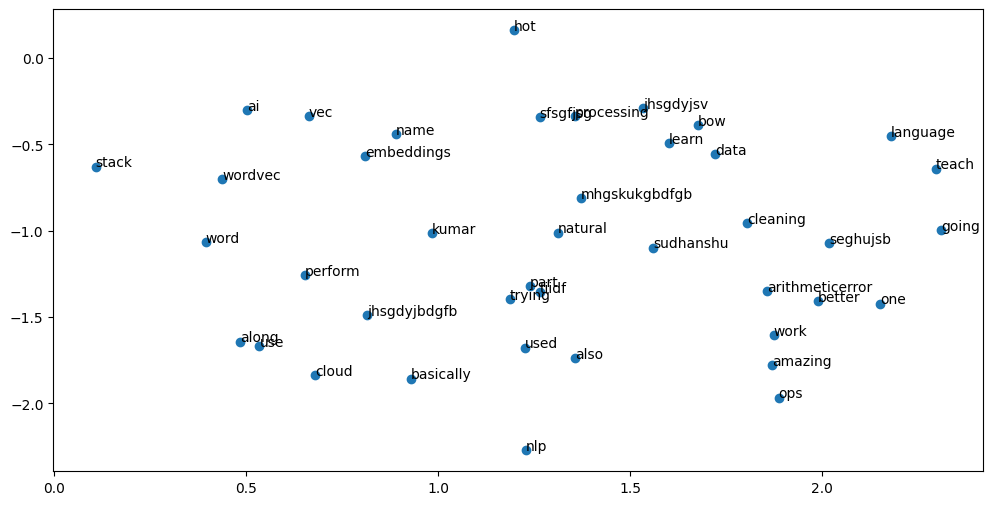

In [52]:
plt.figure(figsize=(12,6))
plt.scatter(x_new_embedings[: , 0] , x_new_embedings[:,1],marker='o')


for i, words in enumerate(vocab[:len(x_new_embedings)]):
    plt.annotate(words, xy=(x_new_embedings[i, 0], x_new_embedings[i, 1]))